In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
data=sio.loadmat('../train/Competition_train.mat')
x_train=data['X']

In [2]:
x_train.shape

(278, 64, 3000)

In [3]:
y = data['Y']

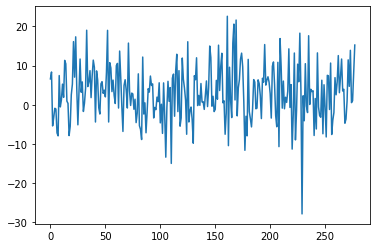

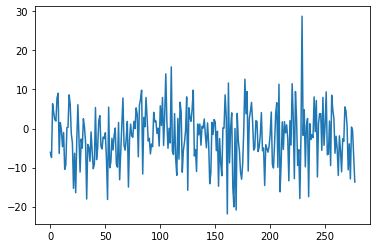

In [4]:
# x_test =data['x_test']
# y_train=data['y_train']
# for i in range(1,100):
#     plt.figure(i)
#     plt.plot(x_train[:,i-1,0])
    
plt.figure(1)
plt.plot(x_train[:,0,0])
plt.figure(2)
plt.plot(x_train[:,1,0])
# plt.figure(3)
# plt.plot(x_train[:,2,0])
# plt.figure(4)
# plt.plot(x_train[:,3,0])
plt.show()

# 处理一列时序数据

In [5]:
#傅里叶变换处理这些震动的数据
list = []
k = 0
for i in range(0,3001):
    list.append(k)
    k = k + 0.001
list1 = []
for i in list:
    i = int(i*1000)/1000
    list1.append(i)

In [6]:
import pandas as pd
df = pd.DataFrame(list,columns=['time']) 
df

,time
0,0.000
1,0.001
2,0.002
3,0.003
4,0.004
...,...
2996,2.996
2997,2.997
2998,2.998
2999,2.999


In [7]:
#尝试放入一列时序数据进入
x_train0 = x_train[0,1,:]
x_train0.reshape(-1,1)
x_train0.shape

(3000,)

In [8]:
type(x_train0)
x_train0 = pd.DataFrame(x_train0)
x_train0.loc[3000] = y[0] 
df['data0']  = x_train0
df

,time,data0
0,0.000,-6.12500
1,0.001,-6.06250
2,0.002,-5.40625
3,0.003,-5.25000
4,0.004,-4.65625
...,...,...
2996,2.996,1.96875
2997,2.997,1.34375
2998,2.998,0.15625
2999,2.999,0.65625


## 展示未进行预处理时的数据样式

<IPython.core.display.Javascript object>


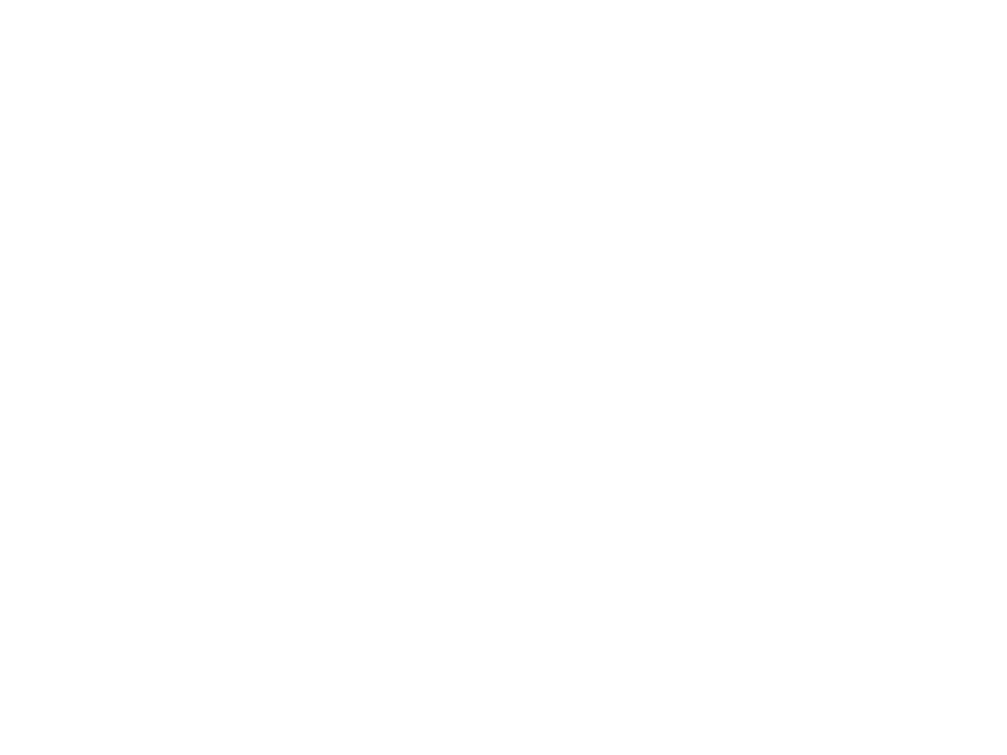

Text(0.5, 1.0, '第一列数据的数据描述')

In [9]:
#对该列数据进行数据可视化
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib notebook
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.figure()
plt.plot(df,color='b')
plt.xlabel('时间序列（单位：毫秒）')
plt.ylabel('数据信号显示')
plt.title('第一列数据的数据描述')

## 对该列数据进行傅里叶变换，将数据进行处理

<IPython.core.display.Javascript object>


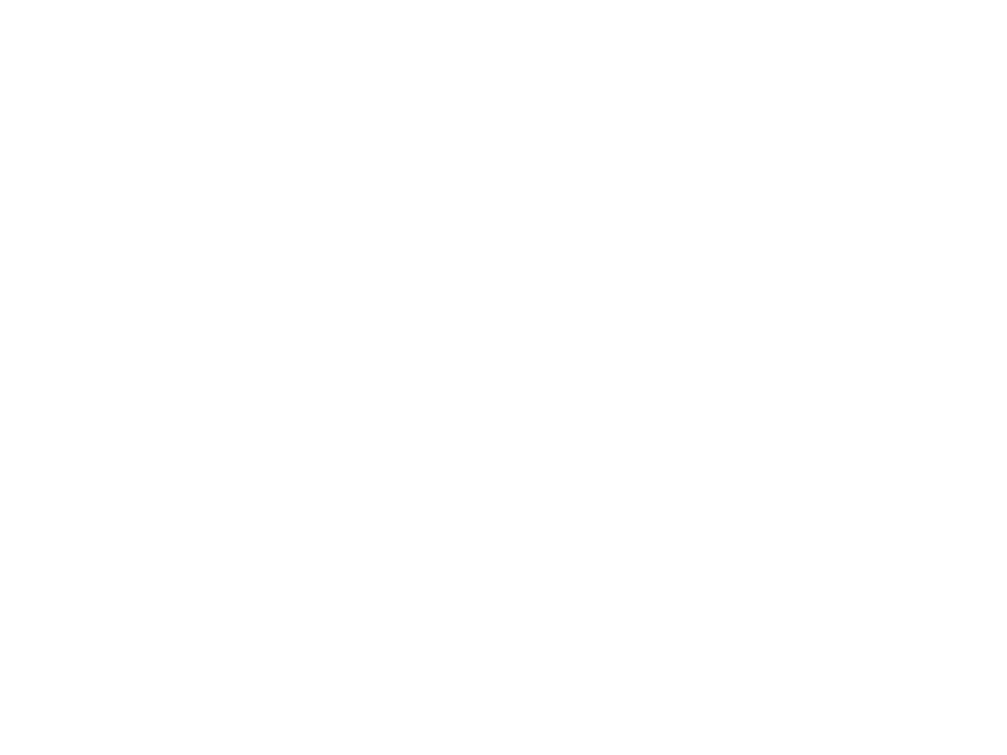

Text(0.5, 1.0, '频率反馈')

In [10]:
x_time=df.time
y_amp=df.data0.values#data0的数据
rate=1000

'''傅里叶变化, shift zero frequency to the middle of the array'''
y_f=np.fft.fftshift(np.fft.fft(y_amp))
x_f=np.fft.fftshift(np.fft.fftfreq(x_time.size,d=1/rate))

''' APS spectrum, and switch Pa to dB '''

y_f_norm=np.sqrt(np.abs(y_f**2))
y_log=20*np.log10(y_f_norm)

'''Remove negative frequency'''

x_f_h=x_f[range(x_f.size//2+1,x_f.size)]
y_log_h=y_log[range(y_log.size//2+1,y_log.size)]  

'''Figure Operation'''
plt.figure()
plt.plot(x_f_h,y_log_h,color='k')
plt.xlabel('频率[Hz]')
plt.ylabel('振幅[dB]')
plt.title('频率反馈')   

In [11]:
y_log_h.shape

(1500,)

# 批量化处理所有得时序数据，并且存入csv文件中

In [12]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
data=sio.loadmat('../train/Competition_train.mat')
x_train=data['X']

#傅里叶变换处理这些震动的数据
list = []
k = 0
for i in range(0,3001):
    list.append(k)
    k = k + 0.001
list1 = []
for i in list:
    i = int(i*1000)/1000
    list1.append(i)
import pandas as pd
df = pd.DataFrame(list,columns=['time']) 
df

,time
0,0.000
1,0.001
2,0.002
3,0.003
4,0.004
...,...
2996,2.996
2997,2.997
2998,2.998
2999,2.999


## 将所有的时序数列纵向合并在一起

In [13]:
# from tqdm import tqdm
from tqdm.notebook import tqdm
from time import sleep
# from tqdm import trange
for i in tqdm(range(278)):#[i,j,:]
    sleep(0.01)
    for j in range(0,64):#[0,j,:]
        locals()['x_train'+str(i)] = x_train[i,j,:] #动态设置变量名，字符拼接   x_train0..x_train1...   x_train0 = x_train[0,0,:]
        jack = 'x_train'+str(i)+'_'+str(j)#jack = xtrain0
        m = pd.DataFrame(locals()['x_train'+str(i)],columns=[jack])# pd.DataFrame(x_train0,columns=['x_train0'])
        m.loc[3000] = y[i]
        df = pd.concat([df,m], axis=1)#纵列及合并df和m

In [14]:
df=pd.DataFrame(np.array(df).byteswap().newbyteorder())#清空缓存区
df

,0,1,2,3,4,5,6,7,8,9,...,17783,17784,17785,17786,17787,17788,17789,17790,17791,17792
0,0.000,6.59375,-6.12500,9.21875,-39.34375,-33.06250,-1.21875,20.1875,-22.93750,9.78125,...,-2.71875,-9.81250,13.93750,18.71875,8.59375,-18.90625,9.81250,34.37500,16.18750,45.59375
1,0.001,6.59375,-6.06250,9.75000,-39.62500,-31.93750,-1.12500,19.4375,-23.78125,10.93750,...,-3.46875,-10.84375,12.46875,17.68750,7.65625,-19.28125,9.18750,33.12500,15.93750,44.43750
2,0.002,6.18750,-5.40625,9.84375,-39.46875,-30.40625,-0.31250,17.8750,-22.90625,10.59375,...,-4.43750,-11.87500,10.37500,16.40625,6.21875,-20.25000,8.75000,31.75000,15.31250,44.62500
3,0.003,6.03125,-5.25000,10.40625,-39.84375,-29.65625,0.43750,15.4375,-22.09375,9.93750,...,-4.90625,-12.84375,8.06250,15.09375,5.56250,-21.28125,8.53125,31.00000,15.43750,45.21875
4,0.004,5.50000,-4.65625,10.59375,-40.56250,-29.81250,1.90625,12.9375,-20.50000,9.31250,...,-5.56250,-14.50000,4.75000,13.46875,5.03125,-23.00000,7.09375,29.03125,15.53125,44.96875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,2.996,-1.09375,1.96875,24.31250,-20.12500,6.50000,11.25000,34.4375,-7.28125,22.87500,...,24.87500,9.25000,27.81250,50.21875,46.75000,8.40625,30.53125,44.03125,50.31250,65.59375
2997,2.997,-0.46875,1.34375,22.81250,-20.75000,6.21875,11.03125,33.5625,-7.37500,21.12500,...,26.12500,10.25000,28.03125,51.28125,47.34375,8.59375,31.71875,45.03125,51.25000,64.59375
2998,2.998,-0.21875,0.15625,21.40625,-21.06250,5.87500,10.78125,33.1250,-8.21875,18.90625,...,26.09375,9.65625,27.31250,50.87500,47.09375,8.46875,31.40625,44.37500,51.00000,64.25000
2999,2.999,-0.06250,0.65625,21.09375,-21.18750,5.87500,12.00000,34.1875,-7.96875,17.71875,...,26.31250,9.37500,27.25000,50.75000,48.53125,9.43750,31.18750,44.53125,51.15625,63.31250


In [15]:
df.to_csv('../降低维度.csv',index=0)#上述得过程运行时间比较就，所以存储一下

In [3]:
#初始化一个空的dataframe
import pandas as pd
df1 = pd.DataFrame()
df = pd.read_csv("../降低维度.csv")

-1.0

## 特征提取

In [20]:
from tqdm.notebook import tqdm
from time import sleep
import numpy as np
df.shape
for i in tqdm(range(0,df.shape[1])):
    sleep(0.01)
    x_time=df.iloc[:-1,0]
    if i <= df.shape[1]-2:
        y_amp=df.iloc[:-1,i+1]#data0的数据df.data0.values
    else:
        continue
    rate=1000

    '''傅里叶变化, shift zero frequency to the middle of the array'''
    y_f=np.fft.fftshift(np.fft.fft(y_amp))#y_f=np.fft.fftshift(np.fft.fft(y_amp))
    x_f=np.fft.fftshift(np.fft.fftfreq(x_time.size,d=1/rate))#x_f=np.fft.fftshift(np.fft.fftfreq(x_time.size,d=1/rate))

    ''' APS spectrum, and switch Pa to dB '''
    y_f_norm=np.sqrt(np.abs(y_f**2))
    y_log=20*np.log10(y_f_norm)

    '''去除负频数据'''
    x_f_h=x_f[range(x_f.size//2+1,x_f.size)]
    y_log_h=y_log[range(y_log.size//2+1,y_log.size)] 

    jack = str(i)

    #将数据变成dataframe形式
    m = pd.DataFrame(y_log_h,columns=[jack])
    new=pd.DataFrame({'name':df.iloc[3000,i+1]},index=[1]) #将标签放入列表中
    m.append(new,ignore_index=True)
    df1 = pd.concat([df1,m], axis=1)
#     df1[] = pd.DataFrame(y_log_h,columns=[jack]) 
df1=pd.DataFrame(np.array(df).byteswap().newbyteorder())#清空缓存区
df1.to_csv('../傅里叶变换.csv',index=0)

D:\anaconda_files\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [ ]:
# df2 = df1.drop(['0'],axis=1)

In [ ]:
# df2 = df2.values.reshape(-1,3000)
# df2 = pd.DataFrame(df2)

In [ ]:
# df2

In [ ]:
# df2.to_csv('../变换形式reshape.csv',index = 0)